# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)

## Attribute Information

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [237]:
import warnings
warnings.filterwarnings('ignore')

### import the datase

In [238]:
import pandas as pd
df = pd.read_csv('winquality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [240]:
df.shape

(1599, 12)

we have 1599 rows and 12 columns including the target

In [241]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

all the values are in float only quality column is in int which is our target

In [242]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [243]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [244]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### checking correlation

In [245]:
corr_mat = df.corr()

In [246]:
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


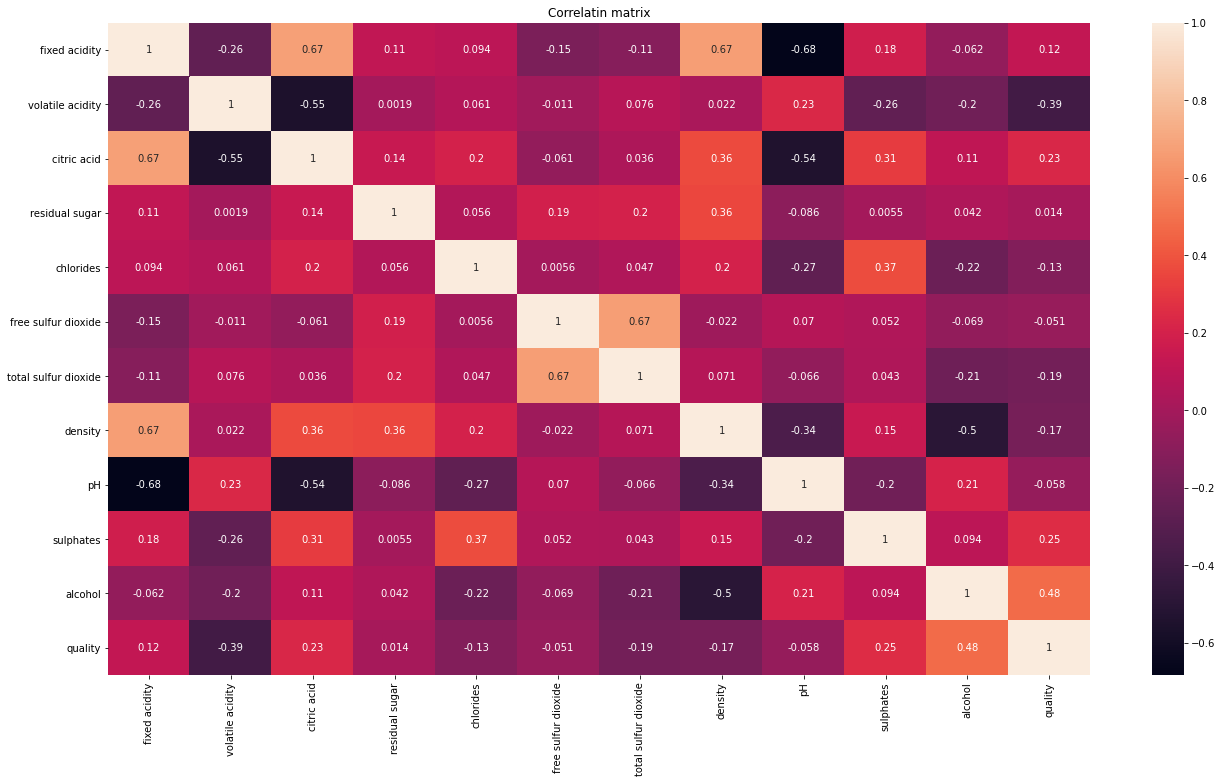

In [247]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlatin matrix')
plt.show()

In [248]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [249]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [250]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [251]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [252]:
df =df.drop('quality',axis =1)

In [253]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [254]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

this is highly imbalenced data

In [255]:
df.shape

(1599, 12)

## EDA

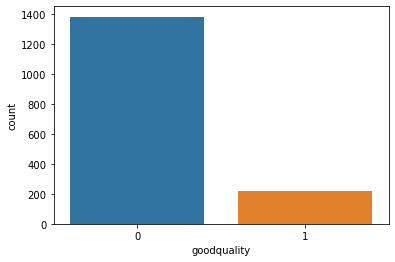

In [256]:
sns.countplot(df['goodquality'])

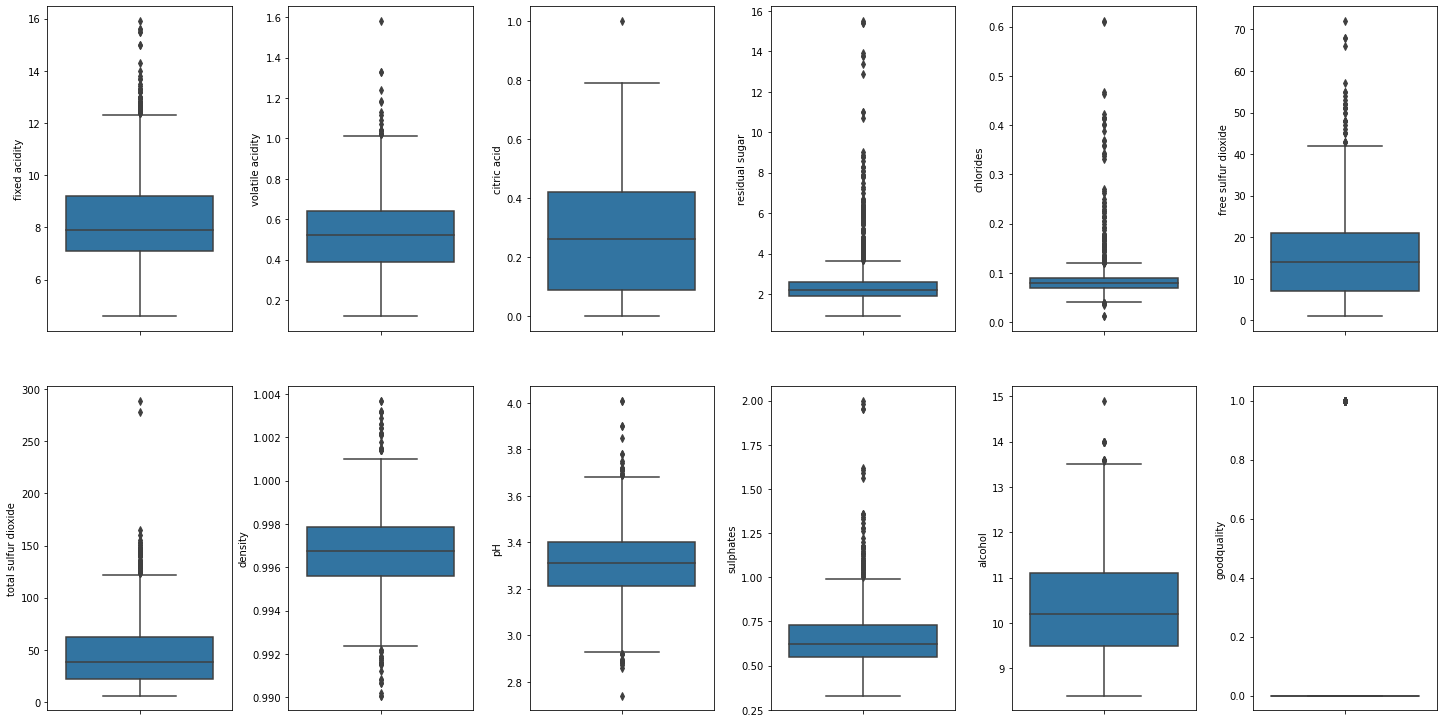

In [257]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

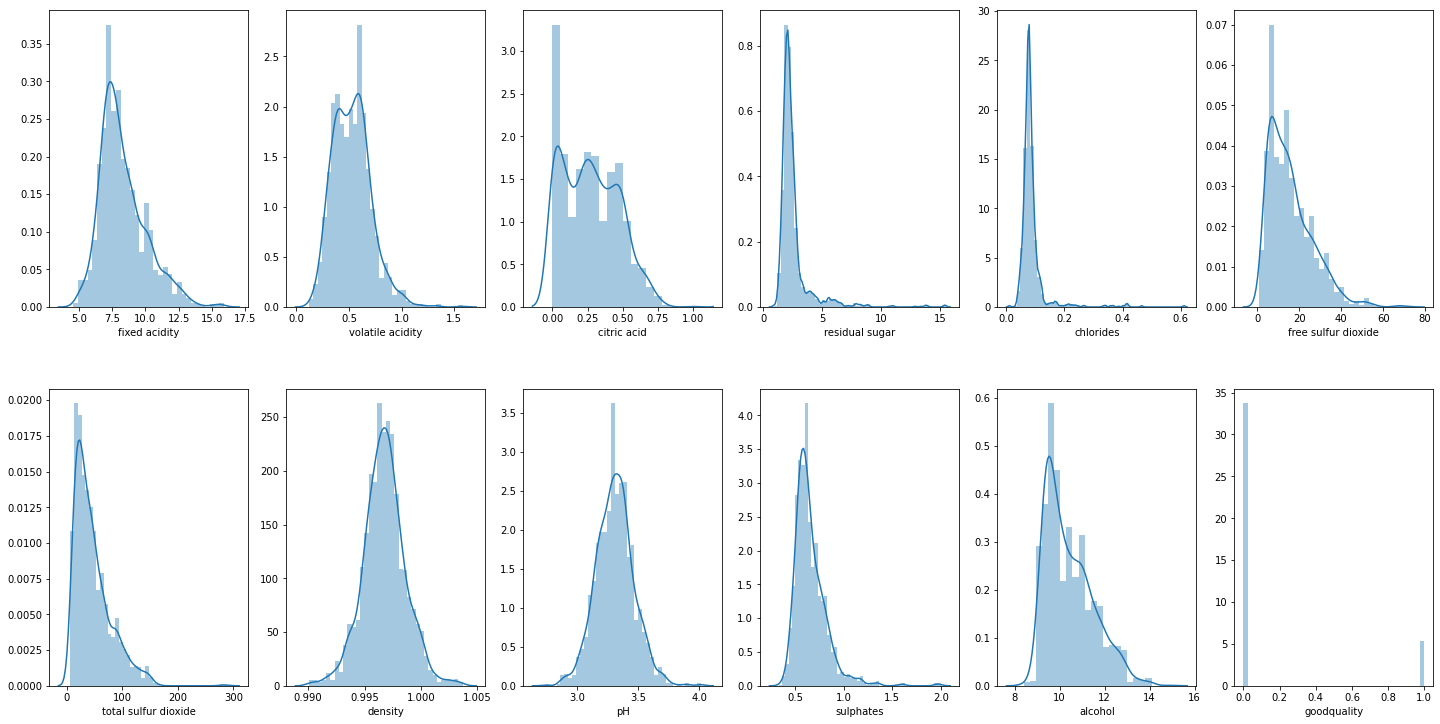

In [258]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


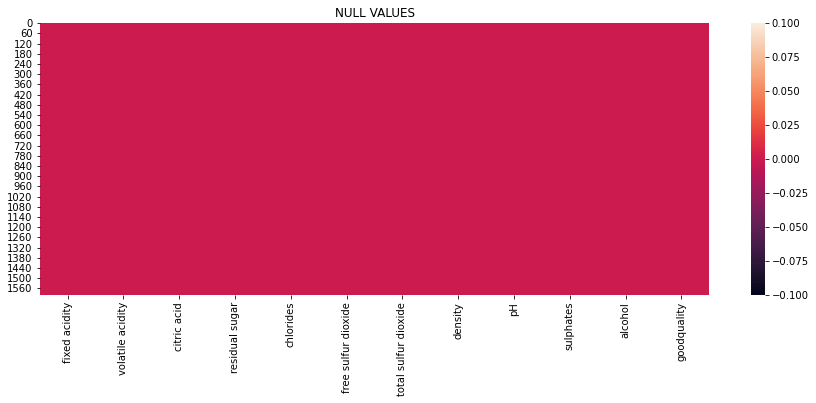

In [259]:
plt.figure(figsize=[15,5])
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

there is no null values in the dataset

## outlier removal

In [263]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis = 1)]

In [264]:
new_df.shape

(1458, 12)

In [265]:
df.shape

(1599, 12)

In [266]:
df= new_df

In [267]:
(141/1599)*100

8.818011257035648

In [268]:
x = df.drop('goodquality',axis =1)
y = df['goodquality']

In [269]:
x.shape

(1458, 11)

In [270]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [271]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [272]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new =pd.DataFrame(df_new,columns=x.columns)

In [273]:
df_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

In [274]:
x =df_new

In [275]:
x.shape

(1458, 11)

In [276]:
y.shape

(1458,)

In [277]:
x.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [278]:
y.isna().sum()

0

## finding the best random state

In [279]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [280]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    accu = accuracy_score(y_test,predrf)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,"random_state is",i)

best accuray score is 0.91324200913242 random_state is 199


## Class Imbalancement


In [308]:
y.value_counts()

1    1257
0    1257
Name: goodquality, dtype: int64

In [309]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)

In [310]:
y.value_counts()

1    1257
0    1257
Name: goodquality, dtype: int64

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)

In [312]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8225165562913908
[[283  70]
 [ 64 338]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       353
           1       0.83      0.84      0.83       402

    accuracy                           0.82       755
   macro avg       0.82      0.82      0.82       755
weighted avg       0.82      0.82      0.82       755



In [313]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy score :
0.9059602649006623
[[310  43]
 [ 28 374]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       353
           1       0.90      0.93      0.91       402

    accuracy                           0.91       755
   macro avg       0.91      0.90      0.91       755
weighted avg       0.91      0.91      0.91       755



In [314]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.895364238410596
[[300  53]
 [ 26 376]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       353
           1       0.88      0.94      0.90       402

    accuracy                           0.90       755
   macro avg       0.90      0.89      0.89       755
weighted avg       0.90      0.90      0.89       755



In [315]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.9324503311258279
[[319  34]
 [ 17 385]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       353
           1       0.92      0.96      0.94       402

    accuracy                           0.93       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.93      0.93      0.93       755



In [316]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred = etc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.9470198675496688
[[322  31]
 [  9 393]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       353
           1       0.93      0.98      0.95       402

    accuracy                           0.95       755
   macro avg       0.95      0.94      0.95       755
weighted avg       0.95      0.95      0.95       755



In [317]:
import xgboost as xgb
Xg = xgb.XGBClassifier()
Xg.fit(x_train,y_train)
pred = etc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[17:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score :
0.9470198675496688
[[322  31]
 [  9 393]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       353
           1       0.93      0.98      0.95       402

    accuracy                           0.95       755
   macro avg       0.95      0.94      0.95       755
weighted avg       0.95      0.95      0.95       755



In [318]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [319]:
pred = kn.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.9072847682119205
[[284  69]
 [  1 401]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       353
           1       0.85      1.00      0.92       402

    accuracy                           0.91       755
   macro avg       0.92      0.90      0.91       755
weighted avg       0.92      0.91      0.91       755



In [320]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7576158940397351
[[286  67]
 [116 286]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       353
           1       0.81      0.71      0.76       402

    accuracy                           0.76       755
   macro avg       0.76      0.76      0.76       755
weighted avg       0.76      0.76      0.76       755



In [321]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lg,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8090706755483037


In [322]:
scr = cross_val_score(dt,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8770761882885951


In [323]:
scr = cross_val_score(sv,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8639580841643367


In [324]:
scr = cross_val_score(rf,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.9156756671128606


In [325]:
scr = cross_val_score(etc,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.9315905364624999


In [326]:
scr = cross_val_score(Xg,x,y,cv=5)
print('coss validation score is',scr.mean())

[17:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [327]:
scr = cross_val_score(kn,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8659382351310464


In [328]:
scr = cross_val_score(sgd,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7903661695167641


minimum difference in accuracy and cross validation score is for etra tree classifier 

## Hyper parameter tuning

In [330]:
from sklearn.model_selection import GridSearchCV

In [333]:
parameters ={'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [334]:
gcv = GridSearchCV(etc,parameters, cv =5)

In [335]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [336]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [337]:
final_mod =DecisionTreeClassifier(criterion='entropy',max_depth= 8,random_state=199)
final_mod.fit(x_train,y_train)
predict= final_mod.predict(x_test)
accu = accuracy_score(y_test,predict)
print(accu)

0.8781456953642384


## saving the model

In [343]:
import joblib
joblib.dump(final_mod,'redModeletc.pkl')

['redModeletc.pkl']

## Loading the saved model 

In [344]:
model = joblib.load('redModeletc.pkl')

In [345]:
prediction = model.predict(x_test)

In [346]:
print(accuracy_score(y_test,prediction)*100)

87.81456953642383


In [347]:
prediction= pd.DataFrame(prediction)#converting into data fram

In [348]:
prediction.to_csv('Result.csv')# saving the prediction

In [349]:
prediction

,0
0,1
1,1
2,0
3,1
4,0
...,...
750,1
751,1
752,0
753,0


## AUC ROC curve:

In [338]:
from sklearn.metrics import plot_roc_curve

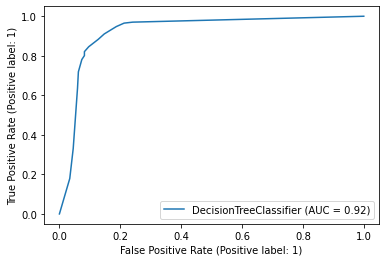

In [342]:
plot_roc_curve(final_mod,x_test,y_test)
plt.show()

model gives AUC value of 0.92
